# NBA Data Exploratory Data Analysis

This notebook performs exploratory data analysis on the cleaned NBA dataset (2021-2025).

## Dataset Overview
- **Shape**: 2,825 player-season combinations
- **Columns**: 63 (per game stats, advanced stats, awards)
- **Time Period**: 2021-2025 seasons


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
from pathlib import Path

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create output directory for figures (relative to notebook location)
output_dir = "../figures"
Path(output_dir).mkdir(exist_ok=True)


## Load Data


In [7]:
# Load processed data
df = pd.read_csv("../data/processed/nba_merged_2021_2025.csv")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print("\nFirst few rows:")
df.head()


Dataset shape: (2825, 63)
Columns: 63

First few rows:


,Player,Player_URL,Season,Age,Team,Pos,G,GS,MP,FG,...,NBA1,NBA2,NBA3,AS,6MOY_VOTING,DPOY_VOTING,CPOY_VOTING,MIP_VOTING,ROY_VOTING,MVP_VOTING
0,Stephen Curry,https://www.basketball-reference.com/players/c...,2021,32.0,GSW,PG,63.0,63.0,34.2,10.4,...,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,3.0
1,Bradley Beal,https://www.basketball-reference.com/players/b...,2021,27.0,WAS,SG,60.0,60.0,35.8,11.2,...,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN
2,Damian Lillard,https://www.basketball-reference.com/players/l...,2021,30.0,POR,PG,67.0,67.0,35.8,9.0,...,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,7.0
3,Joel Embiid,https://www.basketball-reference.com/players/e...,2021,26.0,PHI,C,51.0,51.0,31.1,9.0,...,NaN,yes,NaN,yes,NaN,7.0,NaN,NaN,NaN,2.0
4,Giannis Antetokounmpo,https://www.basketball-reference.com/players/a...,2021,26.0,MIL,PF,61.0,61.0,33.0,10.3,...,yes,NaN,NaN,yes,NaN,5.0,NaN,NaN,NaN,4.0


## Summary Statistics


In [8]:
# Generate summary statistics
summary = df.describe()
summary


,Season,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,OBPM,DBPM,BPM,VORP,6MOY_VOTING,DPOY_VOTING,CPOY_VOTING,MIP_VOTING,ROY_VOTING,MVP_VOTING
count,2825.000000,2825.000000,2825.000000,2825.000000,2825.000000,2825.000000,2825.000000,2806.000000,2825.000000,2825.000000,...,2825.000000,2825.000000,2825.000000,2825.000000,58.000000,61.000000,41.000000,5.0,30.000000,61.000000
mean,2023.008850,25.719292,45.201062,21.238938,19.307115,3.205876,6.943363,0.450222,0.978230,2.779929,...,-1.530265,-0.172142,-1.703150,0.517381,6.344828,6.426230,7.146341,1.0,3.600000,6.573770
std,1.409797,4.183740,24.402171,25.877543,9.621489,2.378888,4.896777,0.113808,0.884617,2.279282,...,4.002145,1.942628,5.083652,1.186130,3.532067,3.338957,3.765375,0.0,1.886431,3.547107
min,2021.000000,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-40.700000,-14.500000,-46.600000,-1.700000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
25%,2022.000000,23.000000,24.000000,0.000000,11.600000,1.400000,3.300000,0.405000,0.300000,1.000000,...,-3.100000,-1.000000,-3.500000,-0.100000,3.250000,4.000000,4.000000,1.0,2.000000,4.000000
50%,2023.000000,25.000000,50.000000,7.000000,18.900000,2.600000,5.700000,0.448000,0.800000,2.300000,...,-1.300000,-0.200000,-1.400000,0.100000,6.000000,7.000000,7.000000,1.0,3.500000,7.000000
75%,2024.000000,28.000000,66.000000,40.000000,27.400000,4.400000,9.400000,0.500000,1.500000,4.200000,...,0.400000,0.700000,0.700000,0.800000,9.000000,9.000000,10.000000,1.0,5.000000,10.000000
max,2025.000000,42.000000,84.000000,83.000000,43.500000,11.800000,23.600000,1.000000,5.300000,12.700000,...,37.900000,32.700000,48.600000,10.600000,15.000000,13.000000,14.000000,1.0,7.000000,13.000000


## VORP Analysis by Position

VORP (Value Over Replacement Player) measures a player's value compared to a replacement-level player. Let's analyze how VORP varies by position.


In [ ]:
# In-depth analysis for 2025 season only
# Filter out missing VORP values and filter for 2025
df_vorp = df[(df['VORP'].notna()) & (df['Season'] == '2025')].copy()

# Order positions
position_order = ['PG', 'SG', 'SF', 'PF', 'C']
df_vorp['Pos'] = pd.Categorical(df_vorp['Pos'], categories=position_order, ordered=True)
df_vorp = df_vorp.sort_values('Pos')

# Display summary statistics by position (2025 season)
summary_stats = df_vorp.groupby('Pos', observed=True)['VORP'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
summary_stats.columns = ['Count', 'Mean', 'Std', 'Min', 'Max']
print("VORP Summary by Position (2025 Season):")
summary_stats


VORP Summary by Position (All Years Combined):


,Count,Mean,Std,Min,Max
Pos,,,,,
PG,512,0.71,1.47,-1.7,8.9
SG,702,0.31,0.89,-1.7,5.0
SF,553,0.28,0.86,-1.1,5.1
PF,540,0.55,1.17,-1.4,7.4
C,518,0.82,1.42,-0.6,10.6


VORP Summary by Year and Position:
            Count  Mean   Std
Season Pos                   
2021   PG     104  0.71  1.33
       SG     125  0.26  0.76
       SF      98  0.38  1.02
       PF     112  0.43  1.06
       C      101  0.71  1.24
2022   PG     111  0.62  1.37
       SG     157  0.24  0.76
       SF     122  0.26  0.80
       PF     106  0.67  1.15
       C      109  0.84  1.47
2023   PG      92  0.82  1.53
       SG     131  0.34  0.94
       SF     104  0.32  0.91
       PF     103  0.55  1.21
       C      109  0.79  1.39
2024   PG     105  0.72  1.61
       SG     135  0.35  0.96
       SF     124  0.19  0.74
       PF     112  0.58  1.30
       C       96  0.93  1.60
2025   PG     100  0.67  1.51
       SG     154  0.38  1.00
       SF     105  0.28  0.85
       PF     107  0.55  1.11
       C      103  0.84  1.42


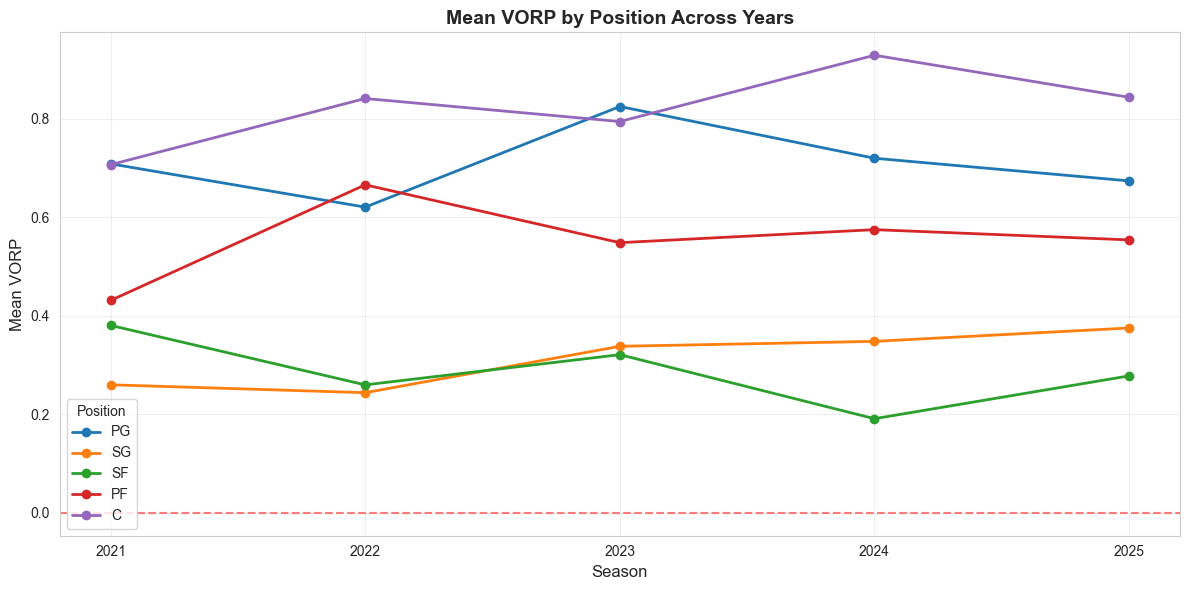

In [29]:
# First, let's analyze VORP by position for each year individually
# This helps us see if patterns are consistent across years

df_vorp = df[df['VORP'].notna()].copy()
position_order = ['PG', 'SG', 'SF', 'PF', 'C']
df_vorp['Pos'] = pd.Categorical(df_vorp['Pos'], categories=position_order, ordered=True)

# Summary by year and position
print("VORP Summary by Year and Position:")
print("=" * 80)
yearly_summary = df_vorp.groupby(['Season', 'Pos'], observed=True)['VORP'].agg(['count', 'mean', 'std']).round(2)
yearly_summary.columns = ['Count', 'Mean', 'Std']
print(yearly_summary)

# Visualize mean VORP by position across years
fig, ax = plt.subplots(figsize=(12, 6))
# Get all unique seasons as integers for x-axis
all_seasons = sorted(df_vorp['Season'].astype(int).unique())

for pos in position_order:
    pos_data = df_vorp[df_vorp['Pos'] == pos]
    yearly_means = pos_data.groupby('Season')['VORP'].mean()
    # Convert season to integer for plotting
    seasons_int = yearly_means.index.astype(int)
    ax.plot(seasons_int, yearly_means.values, marker='o', label=pos, linewidth=2)

ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Mean VORP', fontsize=12)
ax.set_title('Mean VORP by Position Across Years', fontsize=14, fontweight='bold')
ax.legend(title='Position', loc='best')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Replacement Level')
# Set x-axis to show only integer years
ax.set_xticks(all_seasons)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))
plt.tight_layout()
plt.savefig(f"{output_dir}/vorp_by_position_yearly.png", dpi=300, bbox_inches='tight')
plt.show()


### Interpretation of Yearly Trends

The line graph reveals several key patterns in VORP across positions from 2021-2025:

- **Shooting Guards (SG) and Small Forwards (SF)** consistently show the lowest VORP values across all seasons, indicating these positions tend to have players closer to replacement level on average.

- **Centers (C)** demonstrate increasing VORP values over the 5-year period, suggesting that the center position has been producing more valuable players relative to replacement level in recent seasons.

- Overall, the trends remain **fairly steady** across the time period, with most positions maintaining relatively consistent mean VORP values year-to-year. Point Guards (PG) and Power Forwards (PF) show moderate VORP values that fluctuate slightly but remain stable.

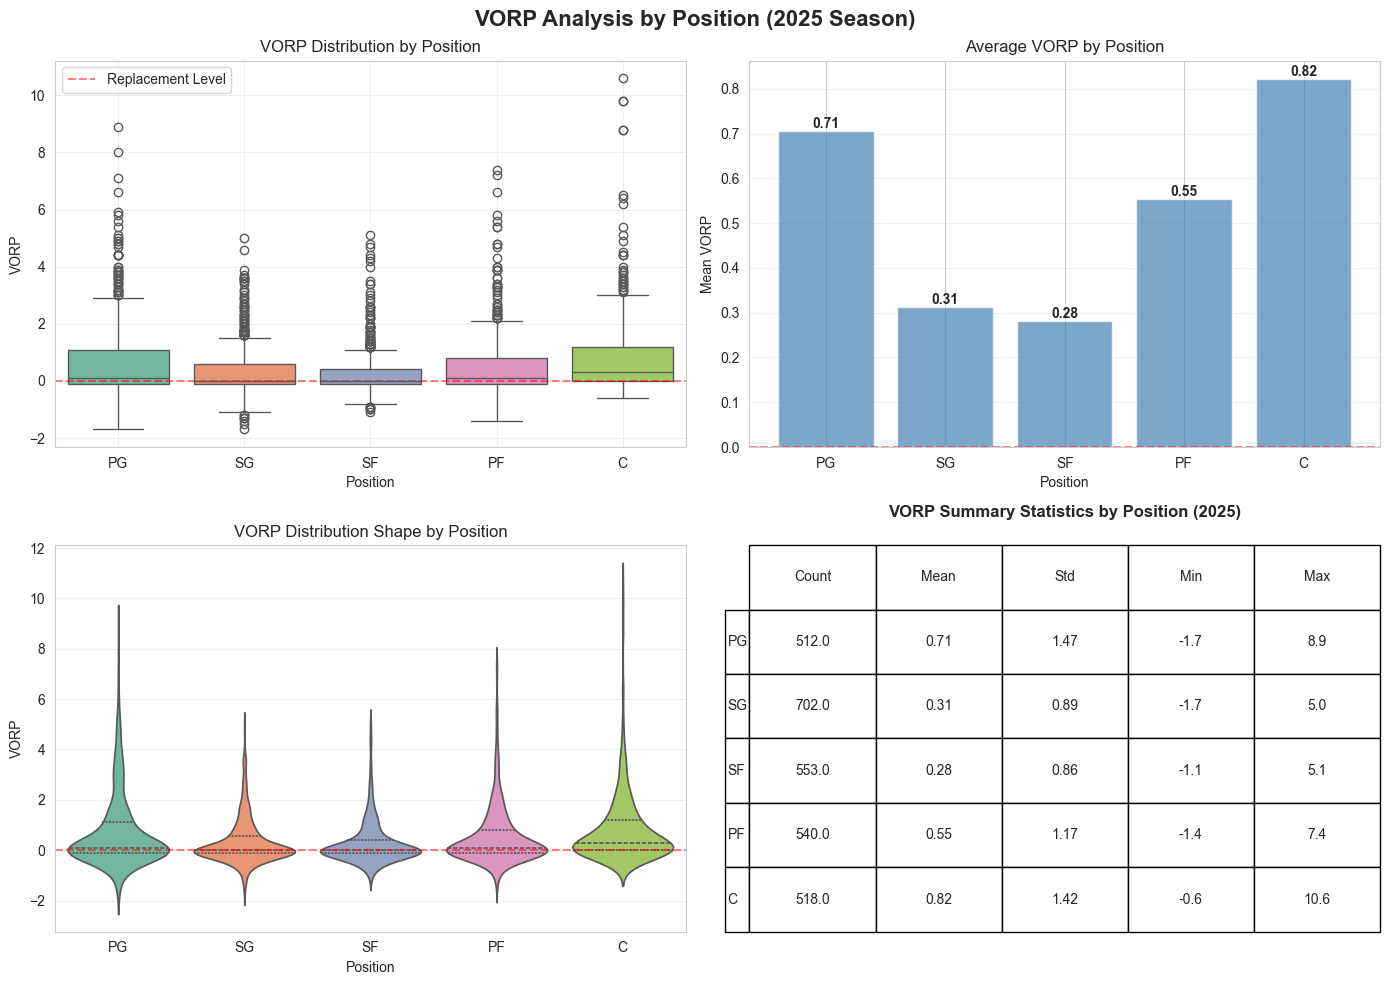

In [ ]:
# Create comprehensive VORP visualization for 2025 season
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('VORP Analysis by Position (2025 Season)', fontsize=16, fontweight='bold')

# 1. Box plot
ax1 = axes[0, 0]
sns.boxplot(data=df_vorp, x='Pos', y='VORP', ax=ax1, hue='Pos', palette='Set2', legend=False)
ax1.set_title('VORP Distribution by Position')
ax1.set_xlabel('Position')
ax1.set_ylabel('VORP')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Replacement Level')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Mean VORP bar chart
ax2 = axes[0, 1]
mean_vorp = df_vorp.groupby('Pos', observed=True)['VORP'].mean().sort_index()
bars = ax2.bar(mean_vorp.index, mean_vorp.values, color='steelblue', alpha=0.7)
ax2.set_title('Average VORP by Position')
ax2.set_xlabel('Position')
ax2.set_ylabel('Mean VORP')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold')

# 3. Violin plot (shows distribution shape)
ax3 = axes[1, 0]
sns.violinplot(data=df_vorp, x='Pos', y='VORP', ax=ax3, hue='Pos', palette='Set2', inner='quartile', legend=False)
ax3.set_title('VORP Distribution Shape by Position')
ax3.set_xlabel('Position')
ax3.set_ylabel('VORP')
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Summary statistics table
ax4 = axes[1, 1]
ax4.axis('off')
table = ax4.table(cellText=summary_stats.values,
                 rowLabels=summary_stats.index,
                 colLabels=summary_stats.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax4.set_title('VORP Summary Statistics by Position (2025)', pad=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{output_dir}/vorp_by_position.png", dpi=300, bbox_inches='tight')
plt.show()


### Key Insights: PG and C as Foundation Positions

The combination of visualizations and summary statistics reveals a clear pattern: **Point Guards (PG) and Centers (C) have the highest average VORP** in the 2025 season, making them the most valuable positions for team building.

**Evidence from the visualizations:**

1. **Box Plot**: Displays the widest distributions and most outliers for PG and C positions, indicating these positions have the **highest concentration of star players** and the **biggest outliers** - elite players who far exceed replacement level.

2. **Bar Chart (Average VORP)**: Shows PG and C with the highest mean VORP values, significantly above other positions.

3. **Violin Plot**: Reveals that PG and C have the most extended upper tails in their distributions, confirming that these positions produce more exceptional players who create significant value above replacement level.

4. **Summary Statistics Table**: The standard deviation (Std) values for PG and C are among the highest, reflecting greater variability and the presence of more outlier players who drive up the mean.

**Strategic Implication**: Given that PG and C positions show both higher average VORP and greater concentrations of elite talent (as evidenced by the numerous outliers in the box plot and extended distributions in the violin plot), **teams should prioritize building around Point Guards and Centers**. These positions offer the best opportunity to acquire players who provide substantial value above replacement level, which is crucial for team success.

## Correlation Heatmap by Position

Explore relationships between different statistical metrics for specific positions (PG and C).


Total rows in 2025 data: 569
Unique positions: ['PG' 'PF' 'C' 'SG' 'SF']
Position value counts:
Pos
SG    154
PF    107
SF    105
C     103
PG    100
Name: count, dtype: int64

Point Guard (PG) - 100 players in 2025 season


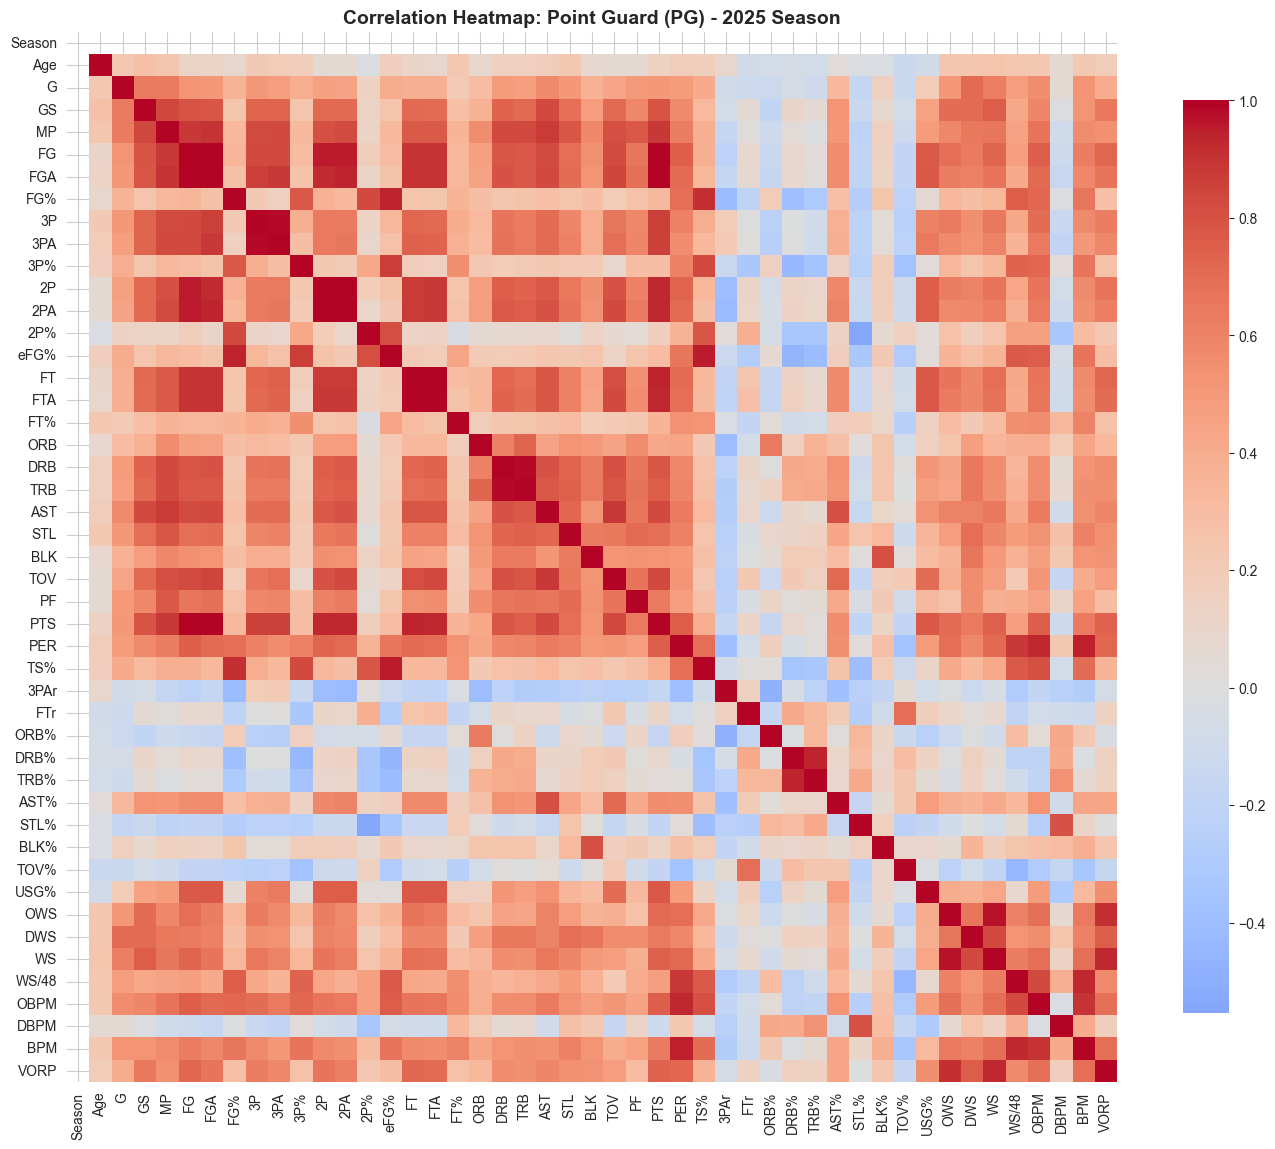

✓ Saved correlation heatmap to ../figures/correlation_heatmap_PG_2025.png
  (Used 47 numeric columns with sufficient data)

Center (C) - 103 players in 2025 season


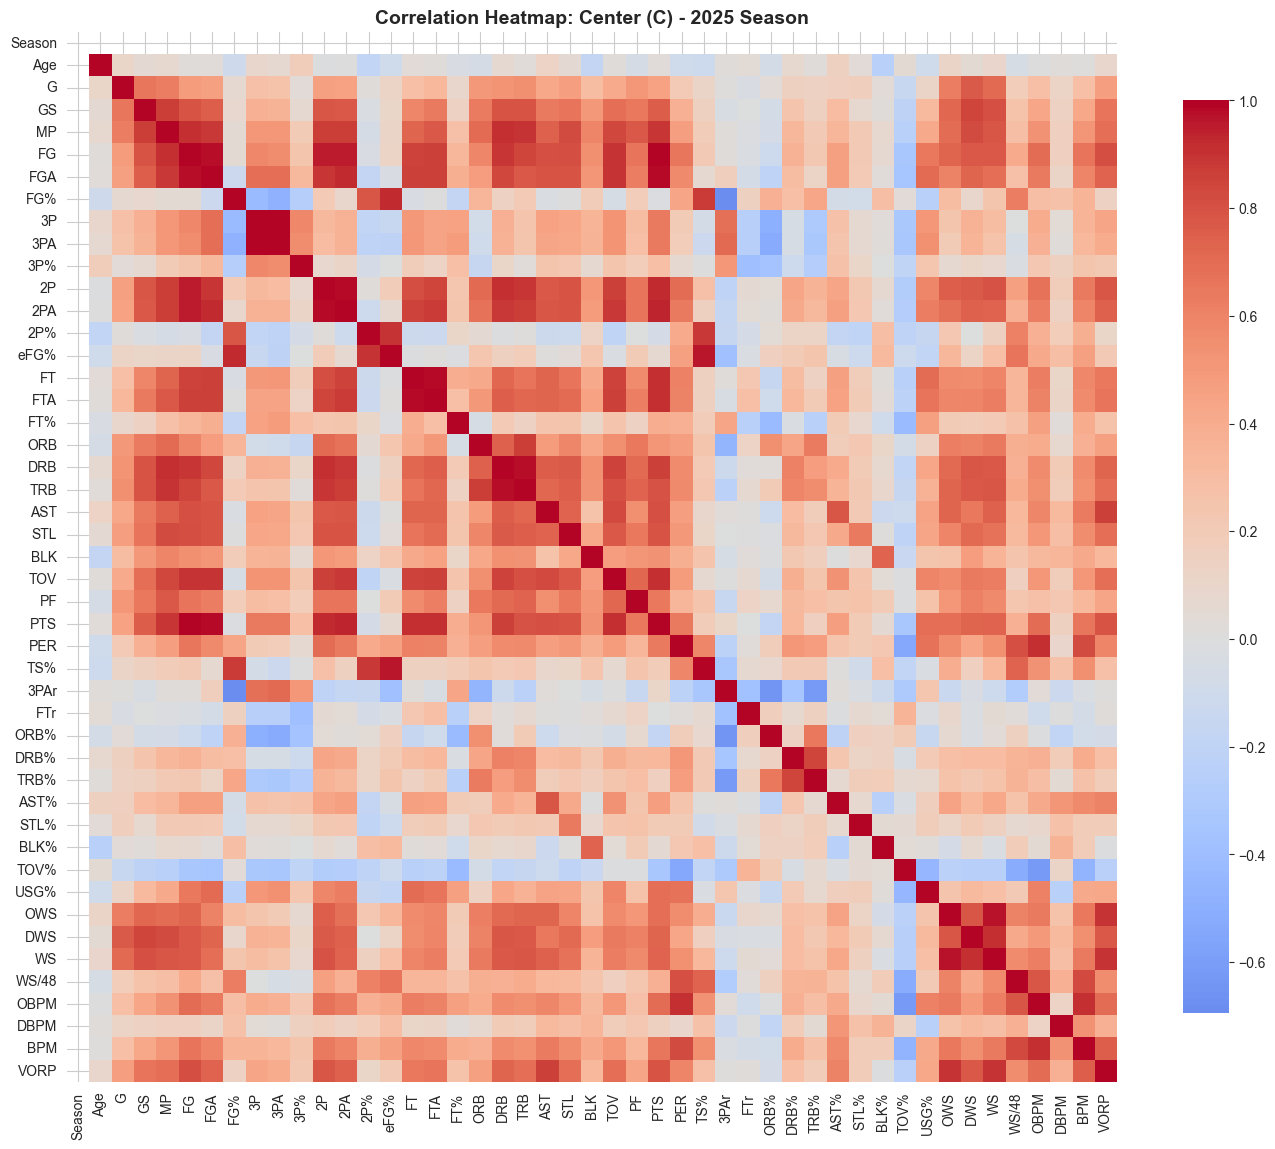

✓ Saved correlation heatmap to ../figures/correlation_heatmap_C_2025.png
  (Used 47 numeric columns with sufficient data)



In [ ]:
# Correlation heatmaps by position (PG and C) for 2025 season
# Filter for 2025 season data - convert Season to string for consistent filtering
# (This matches how cell 7 filters the data)
df_2025 = df[df['Season'].astype(str) == '2025'].copy()

# Debug: Check position values
print(f"Total rows in 2025 data: {len(df_2025)}")
if len(df_2025) > 0:
    print(f"Unique positions: {df_2025['Pos'].unique()}")
    print(f"Position value counts:\n{df_2025['Pos'].value_counts()}\n")
else:
    print("WARNING: No data found for 2025 season.")
    print(f"Available seasons: {sorted(df['Season'].unique())}\n")

# Function to match positions (handles multi-position values like "PG-SG")
def position_matches(pos_value, target_pos):
    """Check if a position value matches the target position."""
    if pd.isna(pos_value):
        return False
    pos_str = str(pos_value).strip().upper()
    target_pos_upper = target_pos.upper()
    
    # Check if it's an exact match or if target position is in the position string
    # Handles cases like "PG", "PG-SG", "SG-PG", etc.
    if pos_str == target_pos_upper:
        return True
    # Check if position contains target (for multi-position values)
    if '-' in pos_str:
        return target_pos_upper in pos_str.split('-')
    return False

# Get numeric columns (excluding voting awards)
numeric_cols = df_2025.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if not col.endswith("_VOTING")]

# Create heatmaps for PG and C
positions_to_plot = ['PG', 'C']
position_names = {'PG': 'Point Guard', 'C': 'Center'}

for pos in positions_to_plot:
    # Filter data for this position
    pos_mask = df_2025['Pos'].apply(lambda x: position_matches(x, pos))
    df_pos = df_2025[pos_mask].copy()
    
    print(f"{position_names[pos]} ({pos}) - {len(df_pos)} players in 2025 season")
    
    if len(df_pos) > 1 and len(numeric_cols) > 1:
        # Filter out columns with too many NaN values (need at least some data for correlation)
        # Keep only columns with at least 50% non-null values
        min_non_null = max(2, len(df_pos) * 0.5)  # At least 2 values or 50% of data
        valid_cols = []
        for col in numeric_cols:
            non_null_count = df_pos[col].notna().sum()
            if non_null_count >= min_non_null:
                valid_cols.append(col)
        
        if len(valid_cols) > 1:
            # Calculate correlation matrix
            correlation_matrix = df_pos[valid_cols].corr()
            
            # Create heatmap
            plt.figure(figsize=(14, 12))
            sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, square=True, 
                        fmt='.2f', cbar_kws={"shrink": 0.8})
            plt.title(f'Correlation Heatmap: {position_names[pos]} ({pos}) - 2025 Season', 
                     fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f"{output_dir}/correlation_heatmap_{pos}_2025.png", dpi=300, bbox_inches='tight')
            plt.show()
            print(f"✓ Saved correlation heatmap to {output_dir}/correlation_heatmap_{pos}_2025.png")
            print(f"  (Used {len(valid_cols)} numeric columns with sufficient data)\n")
        else:
            print("  Not enough valid numeric columns for correlation (need at least 2 columns with data)\n")
    else:
        print("  Not enough data to create correlation heatmap (need at least 2 players and 2 numeric columns)\n")


### Correlation Heatmap Analysis: Position-Specific Drivers of VORP

While the correlation heatmaps reveal many relationships across the numerous variables, focusing specifically on what drives VORP for each position reveals interesting position-specific patterns:

**For Centers (C):**
- **Assists (AST) and Turnovers (TOV)** show stronger correlations with VORP for Centers compared to Point Guards, which is somewhat counterintuitive. This suggests that for big men, playmaking ability and ball security are particularly important indicators of value above replacement level.
- **Field Goals Made (FG) and 2-Pointers Made (2P)** also demonstrate stronger relationships with VORP for Centers compared to Point Guards, highlighting the importance of interior scoring volume for center value.

**For Point Guards (PG):**
- **PER (Player Efficiency Rating)** stands out as the primary standout metric for Point Guards, showing a strong correlation with VORP. This suggests that overall efficiency and production, as captured by PER, is the key driver of value for point guards.

**Surprising Finding:**
- **3-Point Attempt Rate (3PAr)** shows surprisingly weak correlation with VORP for both positions, despite the modern NBA's emphasis on three-point shooting. This suggests that while three-pointers are heavily utilized in today's game, the *rate* at which players attempt threes is not a strong predictor of their value above replacement level. This may indicate that shot quality and efficiency matter more than volume, or that other factors (defense, playmaking, etc.) contribute more significantly to VORP than three-point attempt frequency.